# THỰC TẬP XỬ LÍ ẢNH CHIỀU THỨ 5 UTE 
# CHƯƠNG 2

## KHAI BÁO THƯ VIỆN CẦN DÙNG


In [1]:
from skimage import color, exposure, data, morphology
from skimage.filters import sobel, gaussian, threshold_otsu
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import rotate,rescale,resize

## KHỞI TẠO HÀM HIỂN THỊ ẢNH

In [2]:
def plot_comparison(original, filtered, title_filtered,vmin=0,vmax=0.3):
    ''' Hàm này hiển thị ra hai ảnh cạnh nhau, mỗi ảnh được hiển thị bằng màu xám.
    Phần tử bên trái sẽ hiển thị hình ảnh gốc, tiêu để là original. 
    Phần tử bên phải sẽ hiển thị hình ảnh đã được lọc, tiêu đề tự đặt.
    Các trục (axis) của các phần tử hình ảnh sẽ được tắt đi (không hiển thị).'''
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 6), sharex=True, sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title("original")
    ax1.axis("off")
    ax2.imshow(filtered, cmap=plt.cm.gray,vmin = 0, vmax = 0.3)
    ax2.set_title(title_filtered)
    ax2.axis("off")
def show_image(image, title='Image', cmap_type='gray'):
    ''' Hàm này hiển thị một ảnh, tiêu đề tự đặt.
    Trục (axis) của các phần tử hình ảnh sẽ được tắt đi (không hiển thị)'''
    plt.figure()
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)  
    plt.axis('off')  
    plt.show()

## LỌC CẠNH BẰNG BỘ LỌC SOBEL

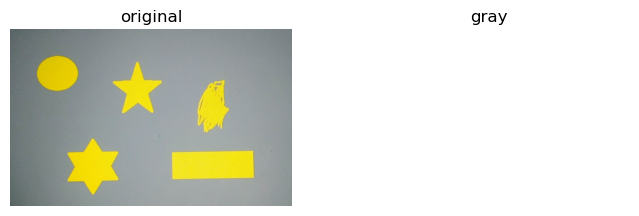

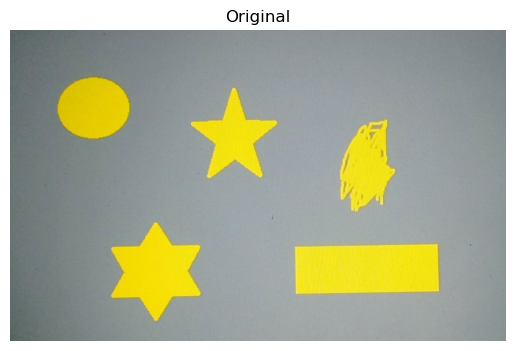

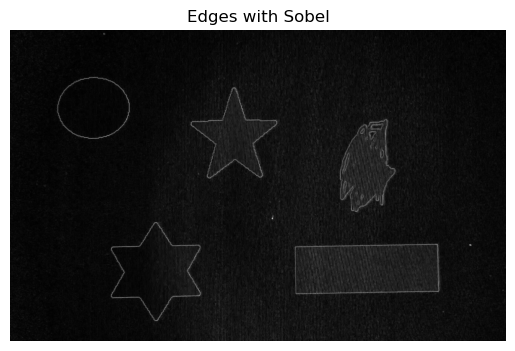

[0.0, 0.2867208813626607]


In [3]:
    # Đọc ảnh từ đường dẫn
image = plt.imread('D:/DOCUMENT/img_123.jpg')
    # chuyển sang ảnh gray
img_gray = color.rgb2gray(image)
    # hiển thị ảnh gốc và ảnh gray
plot_comparison(image,img_gray,'gray')
    # lọc ảnh bằng bộ lọc sobel
edge_sobel = sobel(img_gray)
    # hiển thị ảnh gốc và ảnh đã lọc sobel
show_image(image, 'Original')
show_image(edge_sobel, 'Edges with Sobel')
    # in ra giá trị min và max của ảnh đã lọc sobel
print([edge_sobel.min(),edge_sobel.max()])

## - Nhận xét : 
- Bộ lọc sobel giúp tìm được cạnh của đối tượng, với kết quả trên đã tìm được cạnh nhưng bên trong đối tượng sáng hơn so với bên ngoài nền ảnh. 
- Để giải quyết vấn đề này ta sử dụng thêm bộ lọc gausian trước khi lọc sobel.

## LỌC NHIỄU BẰNG BỘ LỌC GAUSSIAN

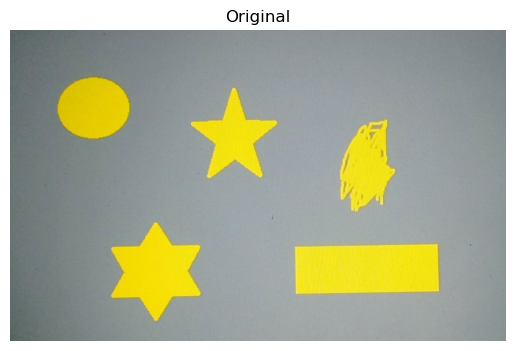

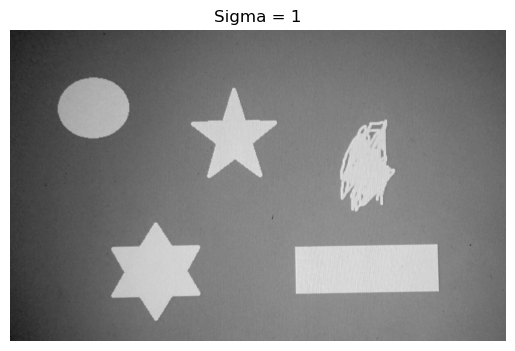

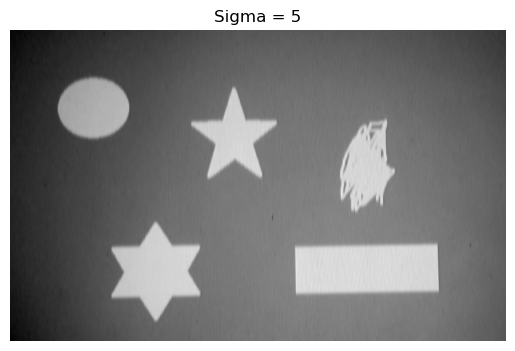

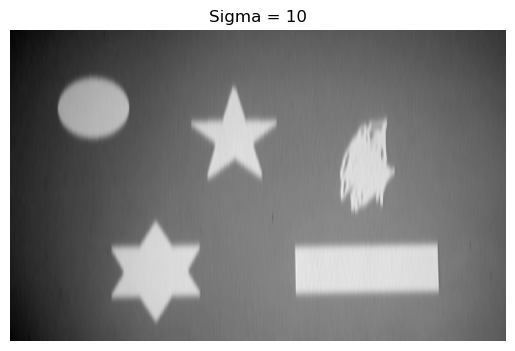

[0.3004610708289847, 0.9627351176456505]
[0.3004610708289847, 0.9627351176456505]
[0.3004610708289847, 0.9627351176456505]
(986, 1573)
(986, 1573)
(986, 1573)


In [4]:
    # lọc ảnh bằng bộ lọc gaussian với các hệ số sigma khác nhau
gaussian_anh1 = gaussian(img_gray,sigma=1,channel_axis=True)
gaussian_anh2 = gaussian(img_gray,sigma=5,channel_axis=True)
gaussian_anh3 = gaussian(img_gray,sigma=10,channel_axis=True)
    # hiển thị kết quả
show_image(image, "Original")
show_image(gaussian_anh1, "Sigma = 1")
show_image(gaussian_anh2, "Sigma = 5")
show_image(gaussian_anh3, "Sigma = 10")
    # in ra giá trị min và max của các ảnh kết quả
print([gaussian_anh1.min(),gaussian_anh1.max()])
print([gaussian_anh1.min(),gaussian_anh1.max()])
print([gaussian_anh1.min(),gaussian_anh1.max()])
    # in ra kích thước ảnh kết quả
print(gaussian_anh1.shape)
print(gaussian_anh2.shape)
print(gaussian_anh3.shape)

## - Nhận xét : 
- Bộ lọc guassian làm cho những điểm ảnh lân cận trở nên giống nhau. Bằng cách điều khiển thông số sigma ta có thể chỉnh độ làm nhòe như kết quả ở trên. 
- Với các sigma khác nhau nhưng cùng ảnh đầu vào nên kích thước và giá trị min, max của các điểm ảnh của các ảnh kết quả trên là như nhau.

#  LỌC CẠNH SOBEL VỚI ẢNH ĐÃ ĐƯỢC LỌC GAUSSIAN

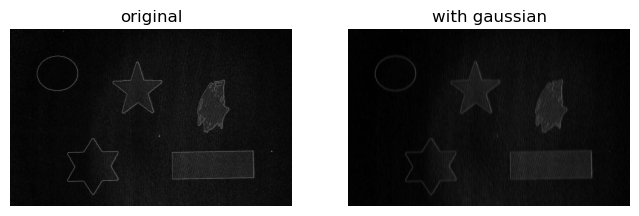

In [6]:
edge_sobel2 = sobel(gaussian_anh2)
plot_comparison(edge_sobel,edge_sobel2,'with gaussian',vmin =0,vmax = 0.3)

In [7]:
print([edge_sobel2.min(),edge_sobel2.max()])
print([edge_sobel.min(),edge_sobel.max()])

[3.1135707502649804e-06, 0.19346248345056208]
[0.0, 0.2867208813626607]


### - Nhận xét : 
- Sử dụng bộ lọc gaussian rồi lọc sobel với 2 thông số điều khiển là vmin = 0 và vmax = 0.3 ta có thể làm nền ảnh trở nên đen hơn.
- Tuy nhiên cạnh sẽ bị mờ hơn so với khi chỉ lọc sobel.

## CÂN BẰNG HISTOGRAM

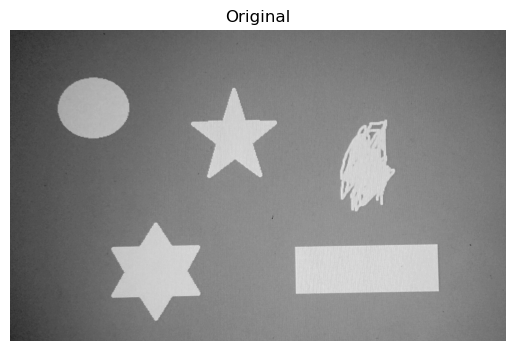

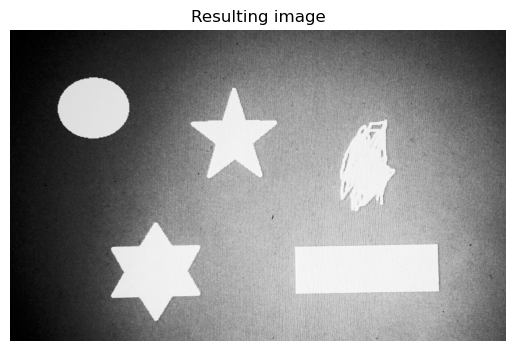

In [5]:
    # cân bằng histogram
img_eq = exposure.equalize_hist(img_gray)
    # hiển thị ảnh gray và ảnh đã cân bằng histogram
show_image(img_gray, 'Original')
show_image(img_eq, 'Resulting image')

### - Nhận xét : 
- Sử dụng cân bằng histogram toàn cục làm tương phản các đối tượng nhưng do yếu tố ánh sáng bên ngoài khi chụp ảnh làm cho ảnh có vùng bị chói như kết quả ở trên.

## KHẢO SÁT LƯỢT ĐỒ XÁM

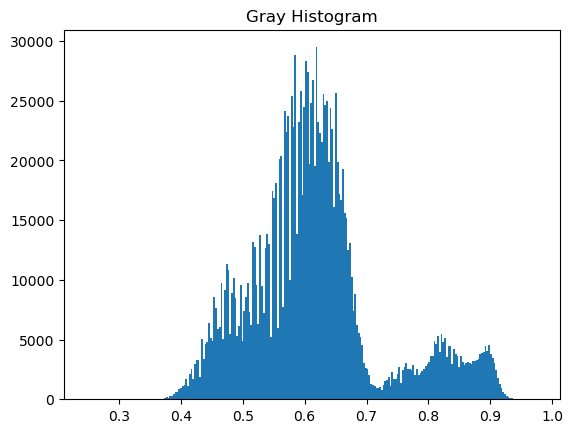

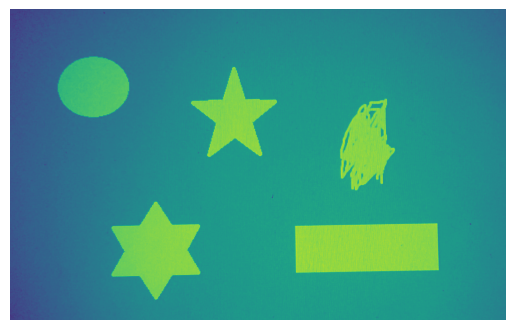

In [6]:
    # cân bằng lượt đồ mức xám cho ảnh gray
plt.hist(img_gray.ravel(), bins=256)
    # đặt tên khung hình và hiển thị
plt.title('Gray Histogram')
plt.figure()
plt.axis('off')  
plt.imshow(img_gray)

### - Nhận xét :
- Ảnh khi được cân bằng histogram có lược đồ xám với 2 vùng như kết quả ở trên.

## TĂNG CƯỜNG ĐỘ TƯƠNG PHẢN SỬ DỤNG CÂN BẰNG LƯỢT ĐỒ MỨC XÁM

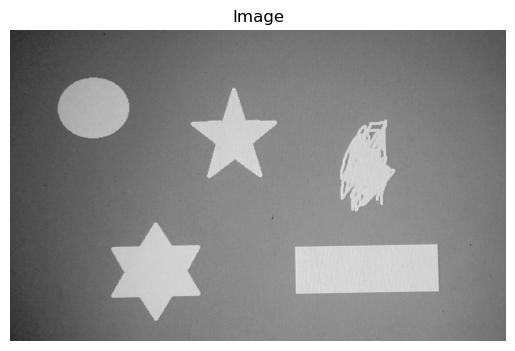

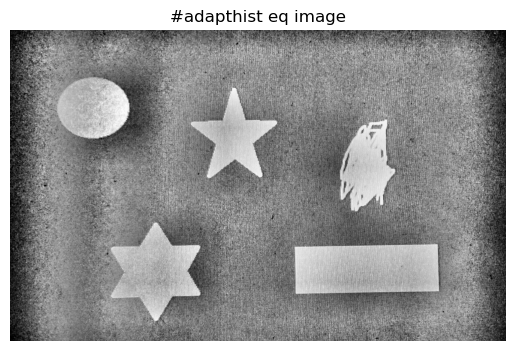

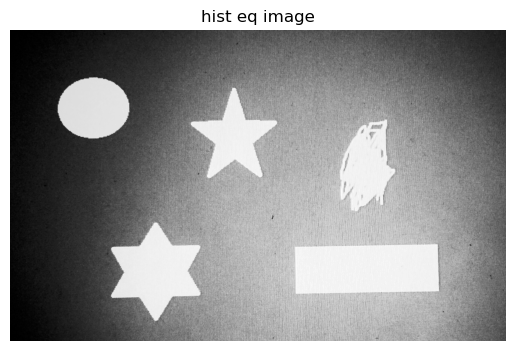

In [7]:
    # ứng dụng phương pháp tăng cường cảnh cục bộ để tăng cường độ tương phản của ảnh
adapthist_eq_image = exposure.equalize_adapthist(img_gray, clip_limit= 0.8)
    # Hiển thị kết quả và so sánh
show_image(img_gray)
show_image(adapthist_eq_image, '#adapthist eq image') # phương pháp tăng cường ảnh cục bộ
show_image(img_eq, 'hist eq image') # tăng cường ảnh truyền thống

### - Nhận xét : 
- Cân bằng histogram toàn cục tác động lên toàn bộ hình ảnh để đảm bảo phân bố mức xám đồng đều
- Tăng cường độ tương phản cục bộ tập trung vào từng phần nhỏ trong hình ảnh để tăng cường độ tương phản và chi tiết trong các vùng cụ thể.
- Với hình ảnh kết quả ở trên ảnh được tăng cương độ tương phản so với ảnh cân bằng histogram thì loại bỏ được vùng chói nhưng độ tương phản giữa đối tượng và nền không rõ bằng.

## XỬ LÍ HÌNH THÁI HỌC

C:\Users\nguyen quoc tan\AppData\Local\Temp\ipykernel_13208\3014561149.py:8: FutureWarning: `selem` is a deprecated argument name for `binary_erosion`. It will be removed in version 1.0. Please use `footprint` instead.
  erase= morphology.binary_erosion(binary,selem=selem)
C:\Users\nguyen quoc tan\AppData\Local\Temp\ipykernel_13208\3014561149.py:13: FutureWarning: `selem` is a deprecated argument name for `binary_dilation`. It will be removed in version 1.0. Please use `footprint` instead.
  dilated  = morphology.binary_dilation(binary,selem=selem)


ngưỡng otsu: 0.7017091681985295


C:\Users\nguyen quoc tan\AppData\Local\Temp\ipykernel_13208\3014561149.py:16: FutureWarning: `selem` is a deprecated argument name for `binary_dilation`. It will be removed in version 1.0. Please use `footprint` instead.
  dilated_image = morphology.binary_dilation(erase,selem=selem)


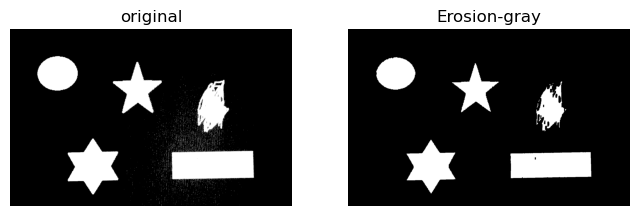

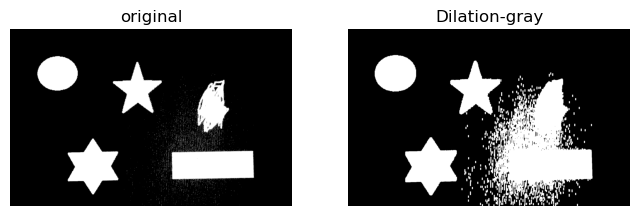

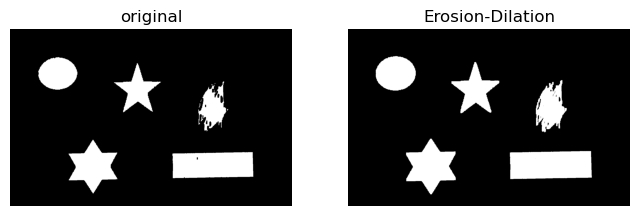

In [8]:
    # tìm ngưỡng thích hợp bằng phương pháp otsu
thresh = threshold_otsu(img_gray)
    # Lấy ngưỡng cho ảnh xám
binary = img_gray > thresh 
    # Định nghĩa thành phần cấu trúc là một hình chữ nhật 12x6
selem = morphology.rectangle(12,6)
    # Thực hiện việc xói mòn ảnh gray 
erase= morphology.binary_erosion(binary,selem=selem)
    # Hiển thị kết quả
plot_comparison(binary, erase, 'Erosion-gray')
print('ngưỡng otsu:',thresh)
    # Thực hiện việc giản nở ảnh gray và hiển thị kết quả
dilated  = morphology.binary_dilation(binary,selem=selem)
plot_comparison(binary, dilated, 'Dilation-gray')
    # thực hiện giản nở ảnh đã bị xóa mòn
dilated_image = morphology.binary_dilation(erase,selem=selem)
plot_comparison(erase, dilated_image, 'Erosion-Dilation')

### Nhận xét :
- Ảnh nhị phân đầu vào có những chấm trắng li ti khi thực hiện xóa mòn (Eosion) sẽ làm mất đi những những điểm ảnh đó.
- Ảnh nhị phân đầu vào có những chấm trắng li ti khi thực hiện giãn nở (dalition) sẽ làm những những điểm ảnh đó lớn lên.
- Còn khi ta thực hiện giản nở ảnh đã được xóa mòn thì có thể loại bỏ những chấm trắng li ti đó mà ảnh kết quả thì gần giống hệt như ảnh nhị phân ban đầu.

## XOAY ẢNH VÀ THAY ĐỔI KÍCH THƯỚC VỚI KỸ THUẬT KHỬ RĂNG CƯA

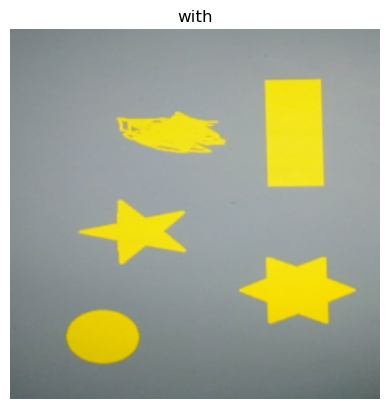

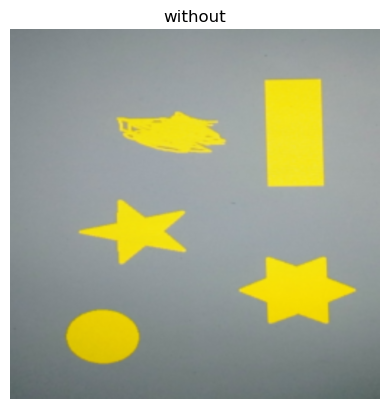

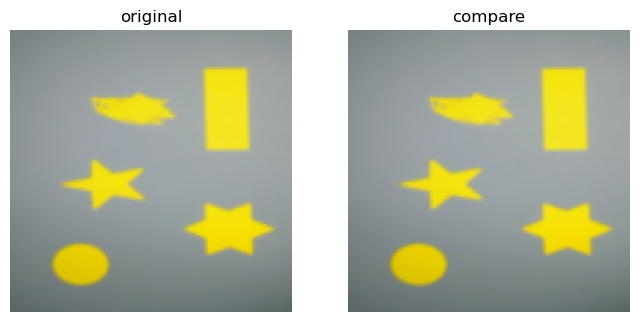

In [9]:
    # xoay ảnh thẳng đứng so với ảnh gốc
resizeImg= resize(image,(256,256))
RotatedImage= rotate(resizeImg,90)
    # Tăng kích thước lên 2 lần sử dụng kỹ thuật khử răng cưa
Zoom_2x_A= rescale(RotatedImage,20,anti_aliasing=True,channel_axis=-1)
    # tăng kích thước lên 2 lần không sử dụng kỹ thuật khử răng cưa
Zoom_2x_B= rescale(RotatedImage,20,anti_aliasing=False,channel_axis=-1)
    # hiển thị kết quả
show_image(Zoom_2x_A, 'with')
show_image(Zoom_2x_B, 'without')
    # Tách một khung ảnh 100*100 cho cả hai trường hợp trên
Crop_A =resize (Zoom_2x_A, (100, 100), anti_aliasing=True)
Crop_B =resize (Zoom_2x_B, (100, 100), anti_aliasing=True)
    # hiển thị kết quả và so sánh
plot_comparison(Crop_A,Crop_B,"compare")

## - Nhận xét :
- khi ta thay đổi kích thước ảnh mà không sử dụng kỹ thuật răng cưa sẽ làm ảnh kết quả bị nhòe hơn so với khi sử dụng kỹ thuật răng cưa.
- khi ta thay đổi kích thức ảnh thì sẽ làm cho ảnh bị mờ đi do số lượng điểm ảnh ban đầu bị thay đổi.

## THAY ĐỔI KÍCH THƯỚC ẢNH

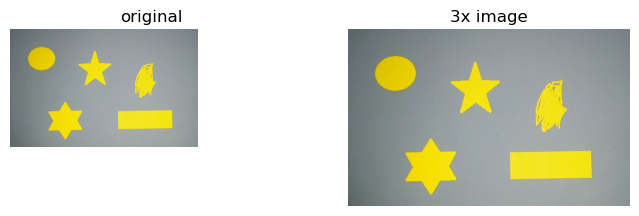

In [10]:
    # khai báo chiều dài và chiều rộng của cột,hàng sau khi xử lý thay đổi kích thước ảnh
height = image.shape[0]*1.5
width = image.shape[1]*1.5
    # Tăng kích thước ảnh lên 3 lần
Zoom_3x_image = resize(image,(height,width),anti_aliasing=True)
    # hiển thị ảnh để đánh giá
plot_comparison(image,Zoom_3x_image,"3x image")

## - Nhận xét :
- khi thay đổi kích thước ảnh là thay đổi số hàng và cột của ma trận ảnh đầu vào.

## THAY ĐỔI TỈ LỆ ẢNH

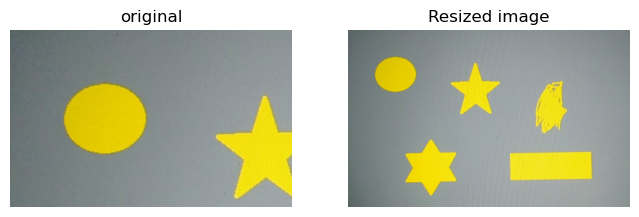

In [11]:
    # khai báo chiều dài và chiều rộng của cột sau khi xử lý thay đổi kích thước ảnh
height = int(image.shape[0] / 2)
width = int(image.shape[1] / 2)
    # Thực hiện thay đổi kích thước ảnh
image_resized = resize(image, (height, width), anti_aliasing=True)
    # Hiển thị kết quả và so sánh
plot_comparison(image,image_resized,'Resized image')

## - Nhận xét:
- Khi thay đổi tỉ lệ ảnh, các pixel trong ảnh có thể bị thay đổi hoặc tái sắp xếp để phù hợp với kích thước mới. Điều này làm thay đổi khía cạnh hình dạng và tỷ lệ của các đối tượng trong ảnh.